In [1]:

%matplotlib widget
from cdasws import CdasWs
cdas = CdasWs()
import matplotlib.pyplot as plt
import numpy as np
from pyrfu.plot import plot_line
from pyrfu import pyrf
import xarray as xr

Load IGRF coefficients ...


In [2]:
dataset = 'OMNI_HRO_1MIN'
var_names = cdas.get_variable_names(dataset)

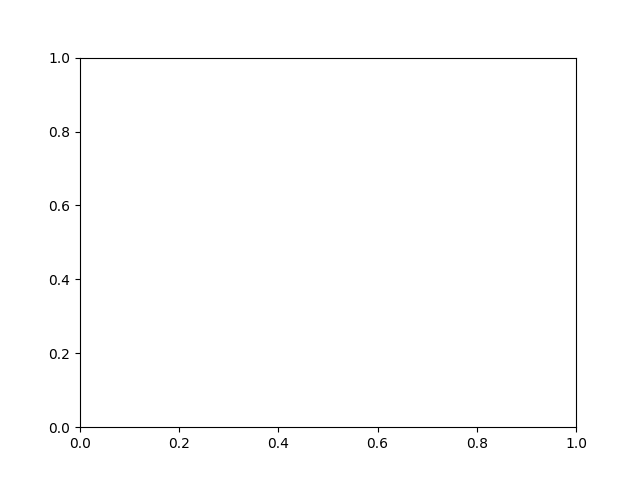

In [3]:




# def fillval2nan(vars):
    
#     valid_idx = [(var < var.attrs['FILLVAL']) for var in vars]
    
#     valid_idx = (var < var.attrs['FILLVAL'])
#     return var[valid_idx], valid_idx

def get_valid_idx(vars):

    valid_masks = [(var != var.attrs['FILLVAL']) for var in vars]
    return np.logical_and.reduce(valid_masks)

fig, ax = plt.subplots(1)
per_year = False
if per_year:
    Ys = np.int64(np.arange(2017, 2025, 1))
    for Y in Ys: 
        tint = [f'{Y}-01-01T00:00:01',f'{Y}-12-31T23:59:01']
        status, data = cdas.get_data(dataset, var_names, tint[0], tint[1])



        # fig, ax = plt.subplots(1)
        time = np.array([np.datetime64(t) for t in data['Epoch']], dtype='datetime64[ns]')

        v = data['flow_speed']
        n = data['proton_density']
        valid_idx = get_valid_idx([n, v])
        time = time[valid_idx]
        v = v[valid_idx]
        n = n[valid_idx]
        ds = xr.Dataset(
            data_vars=dict(
                v=('time', v),
                n=('time', n),
            ),
            coords=dict(
                time=time
            )
        )
        ds.to_netcdf(f'omni_vn_{Y}.cdf')
else:
    tint = ['2017-10-01T00:00:01','2025-05-01T23:59:01']
    status, data = cdas.get_data(dataset, var_names, tint[0], tint[1])



    # fig, ax = plt.subplots(1)
    time = np.array([np.datetime64(t) for t in data['Epoch']], dtype='datetime64[ns]')

    v = data['flow_speed']
    n = data['proton_density']
    valid_idx = get_valid_idx([n, v])
    time = time[valid_idx]
    v = v[valid_idx]
    n = n[valid_idx]
    ds = xr.Dataset(
        data_vars=dict(
            v=('time', v),
            n=('time', n),
        ),
        coords=dict(
            time=time
        )
    )
    ds.to_netcdf(f'omni_vn_2017_2025.cdf')
    
    # plot_line(ax, v_ts, ls='', marker='.')

In [8]:
ds.to_netcdf(f'omni_vn_2017_2024.cdf')

In [43]:
Y = np.int64(np.arange(2017, 2025, 1))
Y

array([2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024])

In [37]:
v_ts.to_netcdf('omni_cdf.cdf')

<Axes: >

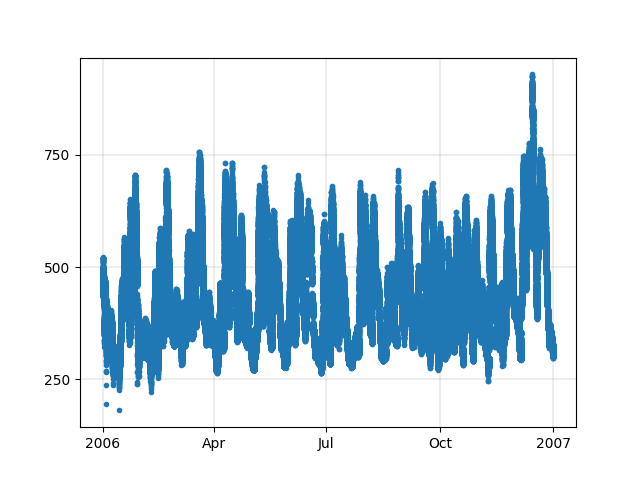